🛠️ Part 1: Setup and Load Data

In [1]:
# Task 1.1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [2]:
# Task 1.2: Load the dataset
data = pd.read_csv("C:\\Users\\marin\\Jupyter Notebooks\\Cardio\\cardio_data.csv")

In [3]:
# Task 1.3: Quick first look
print(data.shape)
print(data.columns)
print(data.head())

(70000, 13)
Index(['id', 'Age', 'Gender', 'Height', 'Weight', 'Systolic', 'Diastolic',
       'Cholesterol', 'Glucose', 'Smoke', 'Alcohol', 'Physical_Activity',
       'CVD'],
      dtype='object')
   id    Age  Gender  Height  Weight  Systolic  Diastolic Cholesterol Glucose  \
0   0  18393       2     168    62.0       110         80      normal  normal   
1   1  20228       1     156    85.0       140         90   very high  normal   
2   2  18857       1     165    64.0       130         70   very high  normal   
3   3  17623       2     169    82.0       150        100      normal  normal   
4   4  17474       1     156    56.0       100         60      normal  normal   

   Smoke Alcohol Physical_Activity  CVD  
0      0      no               yes    0  
1      0      no               yes    1  
2      0      no                no    1  
3      0      no               yes    1  
4      0      no                no    0  


In [4]:
# Task 1.4: Basic information about the dataset
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 70000 non-null  int64  
 1   Age                70000 non-null  int64  
 2   Gender             70000 non-null  int64  
 3   Height             70000 non-null  int64  
 4   Weight             70000 non-null  float64
 5   Systolic           70000 non-null  int64  
 6   Diastolic          70000 non-null  int64  
 7   Cholesterol        70000 non-null  object 
 8   Glucose            70000 non-null  object 
 9   Smoke              70000 non-null  int64  
 10  Alcohol            70000 non-null  object 
 11  Physical_Activity  70000 non-null  object 
 12  CVD                70000 non-null  int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 6.9+ MB
None
                 id           Age        Gender        Height        Weight  \
count  70000.000000  7000

🧹 Part 2: Data Cleaning

In [5]:
# Task 2.1: Check for missing values
print(data.isna().sum())

id                   0
Age                  0
Gender               0
Height               0
Weight               0
Systolic             0
Diastolic            0
Cholesterol          0
Glucose              0
Smoke                0
Alcohol              0
Physical_Activity    0
CVD                  0
dtype: int64


In [6]:
# Task 2.2: Check for duplicates
data.duplicated().sum()

np.int64(0)

In [7]:
# Task 2.3: Standardize column names (make them clean and uniform)
data.columns = data.columns.str.strip().str.lower().str.replace(' ','_')

In [8]:
# Task 2.4: Understand meaning of columns

📖 Dataset Columns Explanation:
- id: Unique identifier for each patient (not useful for analysis).
- age: Age of the patient, measured in days. (Tip: divide by 365 to convert to years.)
- gender: Gender of the patient (1 = Female, 2 = Male).
- height: Height of the patient in centimeters (cm).
- weight: Weight of the patient in kilograms (kg).
- ap_hi: Systolic blood pressure (upper value when the heart beats).
- ap_lo: Diastolic blood pressure (lower value when the heart rests).
- cholesterol: Cholesterol level (1 = normal, 2 = above normal, 3 = well above normal).
- gluc: Glucose level (1 = normal, 2 = above normal, 3 = well above normal).
- smoke: Whether the patient smokes (0 = no, 1 = yes).
- alco: Whether the patient consumes alcohol frequently (0 = no, 1 = yes).
- active: Physical activity status (0 = low activity, 1 = active).
- cardio: Target variable — whether the patient has cardiovascular disease (0 = no, 1 = yes).



In [9]:
# Task 2.5: Check for incorrect or strange values
# For numeric columns like `age`, `height`, `weight`, check for unrealistic values:
data[['age','height','weight']].describe()

,age,height,weight
count,70000.000000,70000.000000,70000.000000
mean,19468.865814,164.359229,74.205690
std,2467.251667,8.210126,14.395757
min,10798.000000,55.000000,10.000000
25%,17664.000000,159.000000,65.000000
50%,19703.000000,165.000000,72.000000
75%,21327.000000,170.000000,82.000000
max,23713.000000,250.000000,200.000000


In [10]:
# age is in days (common in cardio datasets!), so I divide by 365 to get years
data['age'] = (data['age']/365).astype(int)

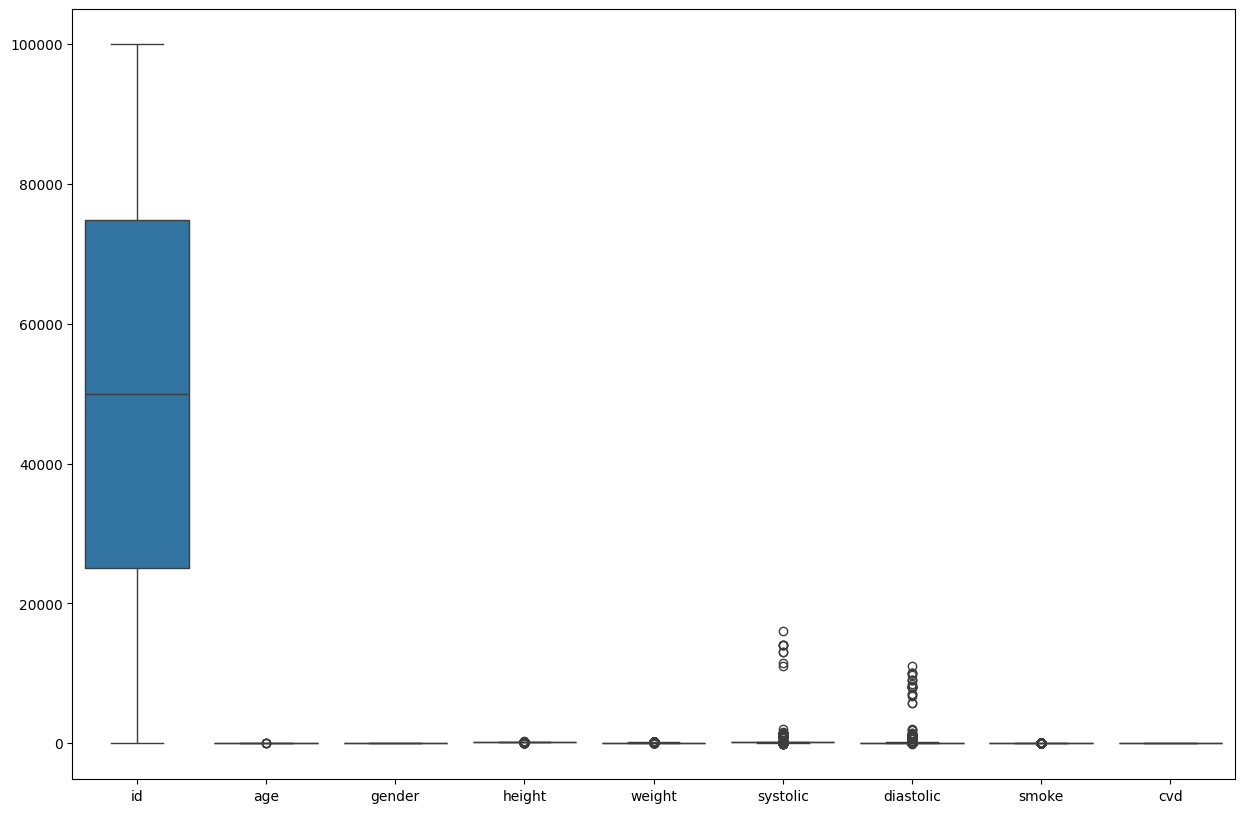

In [11]:
# Task 2.6: Boxplots to check outliers
plt.figure(figsize=(15,10))
sns.boxplot(data=data)
plt.show()

In [12]:
# Task 2.7: Convert categorical variables 
data['gender'] = data['gender'].map({1:'Female', 2:'Male'})

📊 Part 3: Exploratory Data Analysis (EDA)

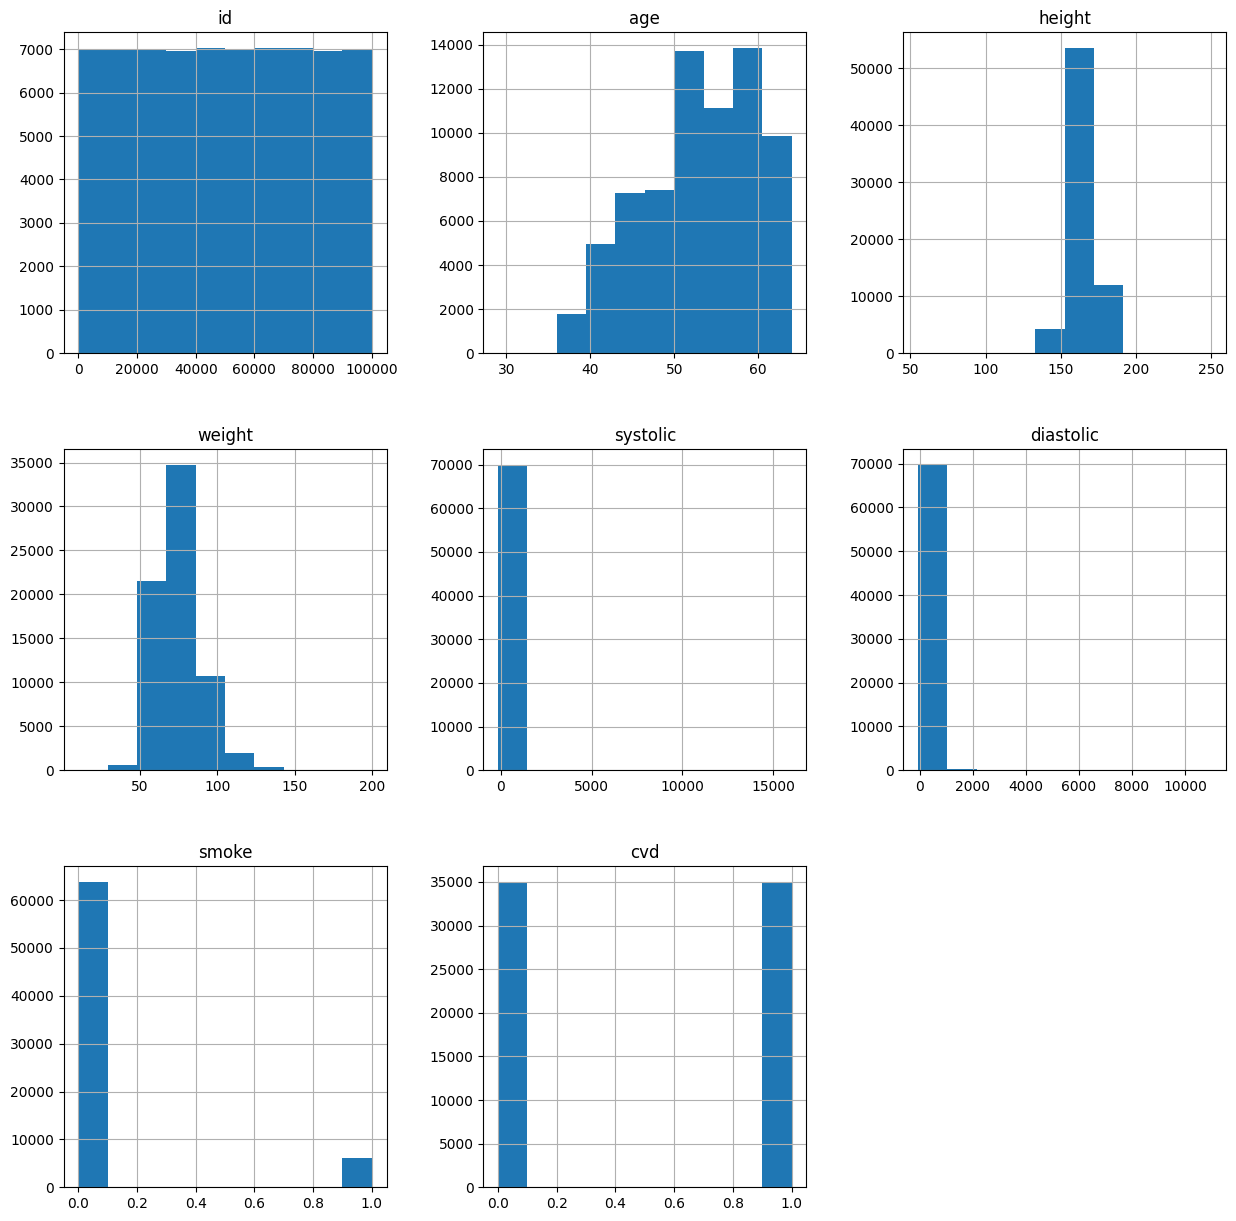

In [13]:
# Task 3.1: Univariate Analysis (Single variable distributions)
# Histograms for numerical features:
data.hist(figsize=(15,15))
plt.show()

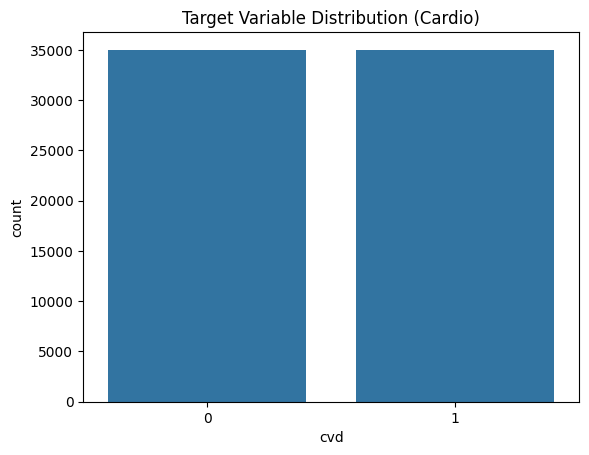

In [14]:
# Countplots for categorical features:
sns.countplot(x='cvd', data=data)
plt.title("Target Variable Distribution (Cardio)")
plt.show()

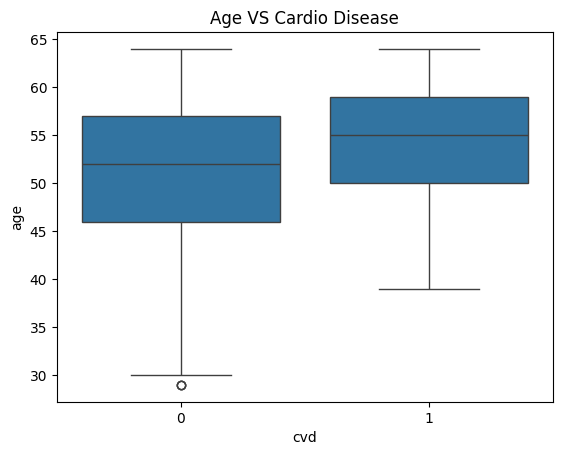

In [15]:
# Task 3.2: Bivariate Analysis (Feature relationships)
# compare age distribution across cardio disease presence:
sns.boxplot(x='cvd', y='age', data=data)
plt.title("Age VS Cardio Disease")
plt.show()

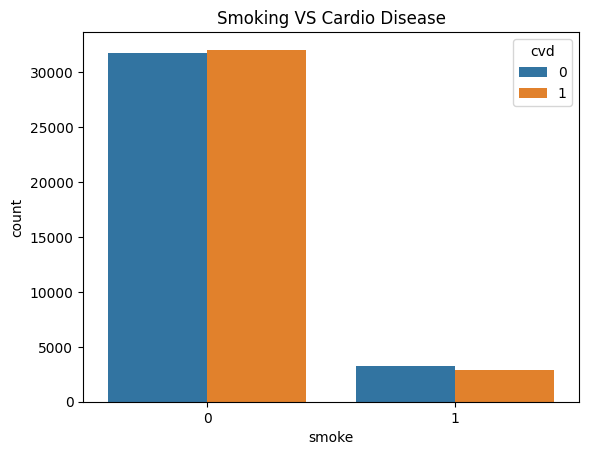

In [16]:
# Relationship between smoking/alcohol and cardio:
sns.countplot(x='smoke', hue='cvd', data=data)
plt.title('Smoking VS Cardio Disease')
plt.show()

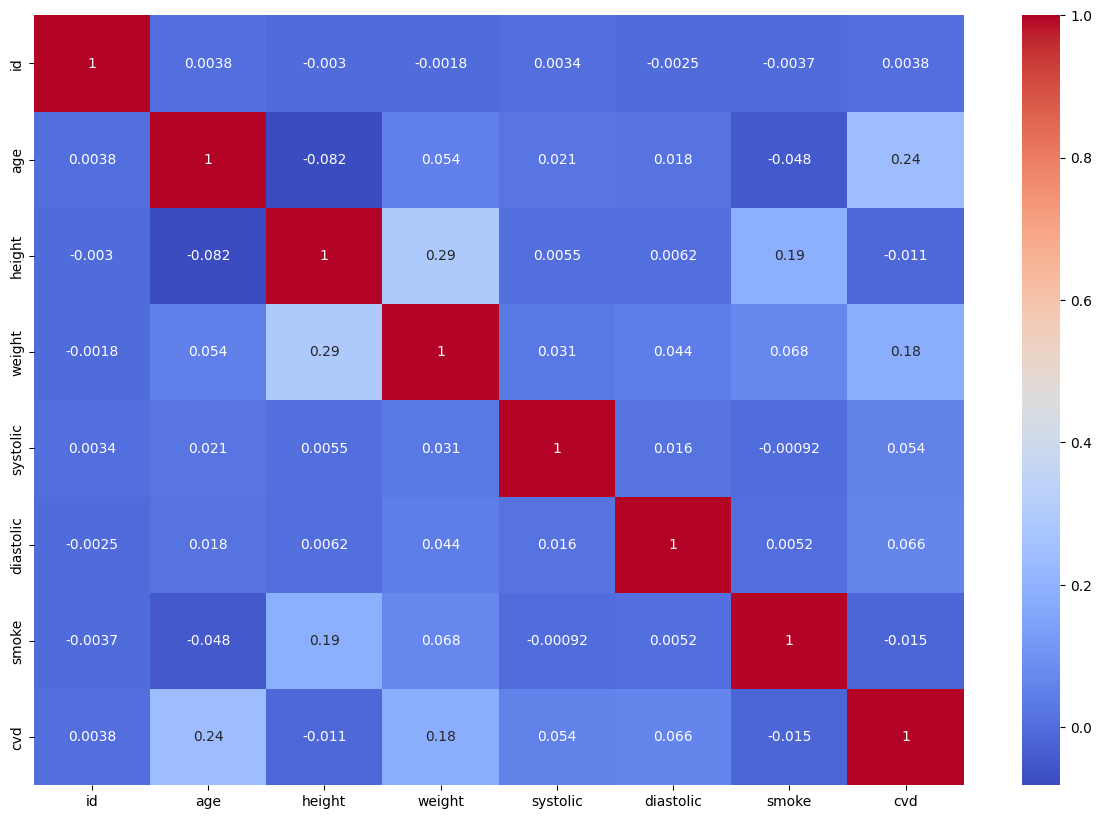

In [17]:
# Task 3.3: Correlation Matrix
# Find how features are correlated 
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

In [18]:
data['gender'] = data['gender'].map({'Female':0, 'Male':1})

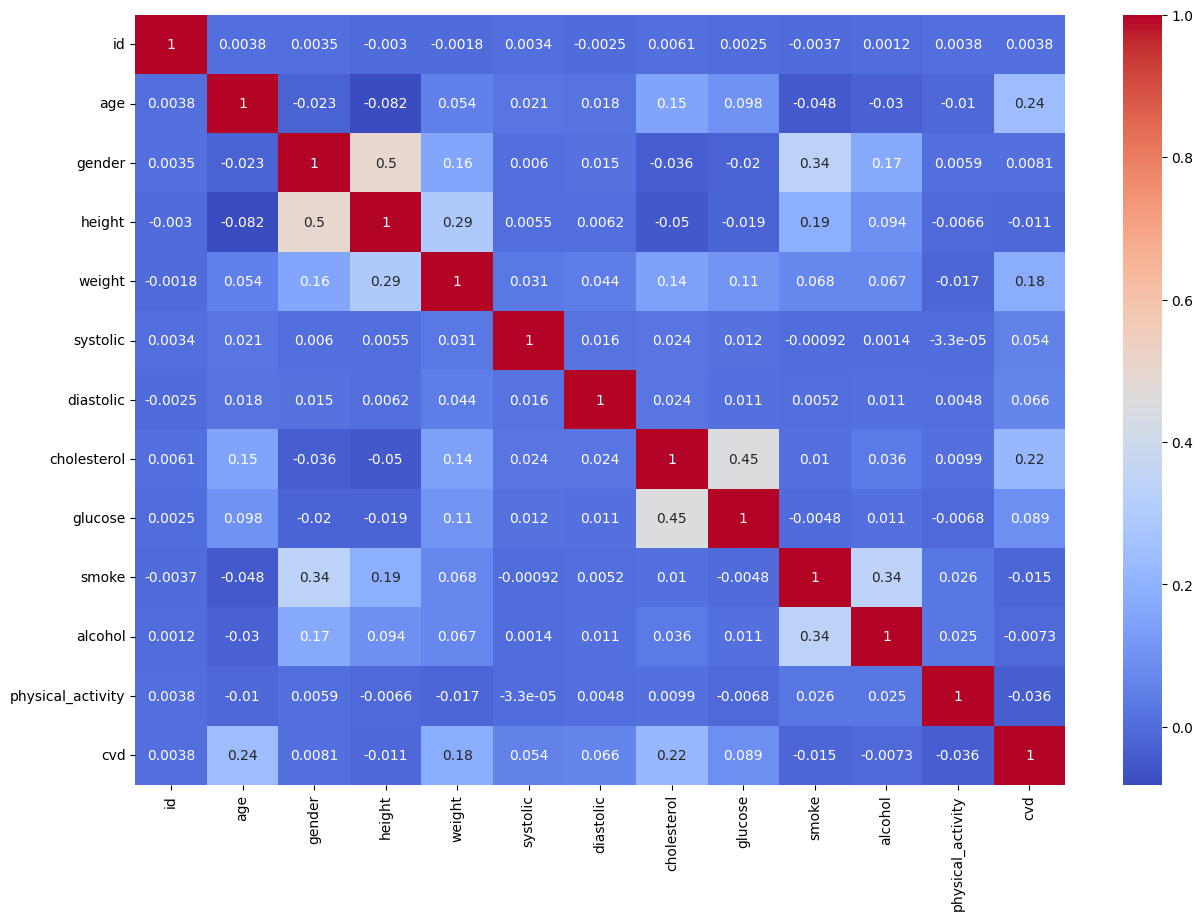

In [26]:
# i changed `gender` column from categorical to numeric so that i can see if there is correlation with cvd 
# Find how features are correlated 
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [20]:
# convert categorical to numeric and repeat heatmap 
data['cholesterol'] = data['cholesterol'].map({'normal':0, 'high':1, 'very high':2})
data['glucose'] = data['glucose'].map({'normal':0, 'high':1, 'very high':2})

In [24]:
data['physical_activity'].unique()

array(['yes', 'no'], dtype=object)

In [25]:
data['alcohol'] = data['alcohol'].map({'no':0, 'yes':1})
data['physical_activity'] = data['physical_activity'].map({'no':0, 'yes':1})

In [27]:
data.dtypes

id                     int64
age                    int64
gender                 int64
height                 int64
weight               float64
systolic               int64
diastolic              int64
cholesterol            int64
glucose                int64
smoke                  int64
alcohol                int64
physical_activity      int64
cvd                    int64
dtype: object

🛠️ Part 4: Data Preparation for Modeling

In [28]:
# Task 4.1: Select Features and Target
X = data.drop(['cvd', 'id'], axis=1)
y = data['cvd']

In [29]:
# Task 4.2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Task 4.3: Feature Scaling (important because height, weight, blood pressure have very different scales)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

🤖 Part 5: Model Building (Logistic Regression)

In [31]:
# Task 5.1: Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [32]:
# Task 5.2: Predict and Evaluate
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

[[5354 1634]
 [2248 4764]]
              precision    recall  f1-score   support

           0       0.70      0.77      0.73      6988
           1       0.74      0.68      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000

Accuracy: 0.7227142857142858


📋 Meaning of classification report

  Term:    |   Meaning: 
- Precision |	- Out of all the times your model predicted class 0 or 1, how many times was it correct? (Low precision = lots of false positives.)
- Recall  |	- Out of all the actual instances of class 0 or 1, how many did the model correctly find? (Low recall = lots of false negatives.)
- F1-score | - Harmonic mean of precision and recall. A good balance when you care about both.
- Support |	- The number of real examples in your test set for each class (0 and 1).

🔵 For Class 0 (no disease):
- Precision 0.70: When the model predicted "no disease," it was right 70% of the time.
- Recall 0.77: It caught 77% of all real "no disease" cases.
- F1-score 0.73: Balance of the above two = 73%.

🔴 For Class 1 (disease):
- Precision 0.74: When the model predicted "disease," it was right 74% of the time.
- Recall 0.68: It caught 68% of all real "disease" cases.
- F1-score 0.71: Balance = 71%.

📢 Quick Summary:
- Your model is decent — around 72% accuracy.
- Precision and Recall are a little imbalanced between the two classes:
    - It is better at predicting "no disease" (Class 0) than      predicting "disease" (Class 1).
    - It misses some "disease" patients (68% recall for Class 1).
- F1-scores (~0.71–0.73) show the model balances precision and recall moderately well.
- Overall performance is okay, but there’s room for improvement (maybe with stronger models like Random Forest, XGBoost, or hyperparameter tuning).

🧠 Overall:
"The logistic regression model achieved 72% accuracy. It predicts patients with no cardiovascular disease slightly better than those with disease. Precision and recall for both classes are close but not perfect, suggesting room for model improvement."

In [33]:
# Task 5.3: Feature Importance Logistic Regression doesn't have .feature_importances_, but you can check coefficients:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(feature_importance)

              Feature  Coefficient
4            systolic     5.555844
0                 age     0.367247
6         cholesterol     0.355736
3              weight     0.218470
5           diastolic     0.058027
1              gender     0.012406
8               smoke    -0.040285
9             alcohol    -0.043772
2              height    -0.043836
7             glucose    -0.061506
10  physical_activity    -0.071625


📋 How to evaluate these results:
- Positive coefficients: Increase the probability of cardiovascular disease (class 1).
- Negative coefficients: Decrease the probability (more likely class 0 — no disease).

📈 Interpretation:
1. Systolic Blood Pressure (ap_hi) is the strongest positive predictor:
    - 5.56 → Very large!
    - Higher systolic pressure massively increases the risk of cardiovascular disease.
2. Age is also very important:
    - 0.37 → Older patients have higher risk.
3. Cholesterol is next:
    - 0.36 → Higher cholesterol levels strongly increase cardiovascular risk.
4. Weight is moderately important:
    - 0.22 → Higher body weight correlates with greater disease risk.
5. Diastolic Blood Pressure (ap_lo) has a small positive impact:
    - 0.06 → It matters, but much less than systolic.
6. Gender has a tiny positive effect:
    - 0.012 → Being male slightly increases the risk, but not strongly.
7. Smoking, alcohol consumption, and height have small negative effects:
    - Slightly surprising; might be data-specific. (Usually, smoking increases risk.)
8. Glucose and Physical Activity are slightly negative:
    - Higher glucose doesn't strongly predict disease here.
    - Physical activity reduces risk (logical).

In [34]:
# Task 6.3: Save Cleaned Dataset
data.to_csv('cardio_cleaned.csv', index=False)

📖 5.3 Evaluation of Feature Importance
The most important feature for predicting cardiovascular disease is systolic blood pressure, with a very high positive coefficient (5.56).
Age, cholesterol levels, and weight also have significant positive influence on disease risk.
Other factors such as diastolic blood pressure and gender have smaller effects.
Surprisingly, features like smoking, alcohol consumption, and glucose levels show weak or negative correlations with disease presence in this dataset, which could indicate data biases or require deeper investigation.
Overall, controlling blood pressure, maintaining healthy cholesterol, and managing weight appear critical in reducing cardiovascular disease risk according to this model.

